In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

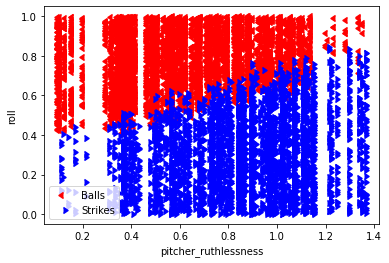

In [140]:
df['svc'] = 0.37847946767478163 * df["pitcher_ruthlessness"] + 0.30163948661504275 * df["ballpark_forwardness"]
df['svc_vibes'] = 0.3570080647613859 * df["pitcher_ruthlessness"] + 0.23460353690794863 * df["ballpark_forwardness"] \
                  + 0.06376601180181157 * df["pitcher_vibes"]
df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]

x_val = "pitcher_ruthlessness"
# x_val = "svc"
fig, ax = plt.subplots(1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
# ax.set_xlim(0.48, 0.52)

# min_x, max_x = ax.get_xlim()
# xx = np.linspace(min_x - 0.1, max_x + 0.1)
# yy = xx * 0.35 + 0.35
# ax.plot(xx, yy)

ax.legend()

# fig.savefig(x_val+".png", facecolor='white')
# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

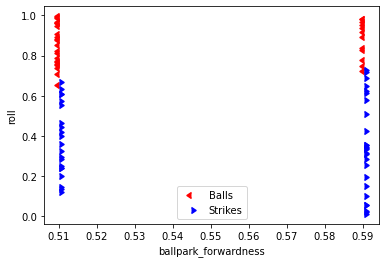

In [192]:
# df['svc'] = 0.37847946767478163 * df["pitcher_ruthlessness"] + 0.30163948661504275 * df["ballpark_forwardness"]
# df['svc_vibes'] = 0.3570080647613859 * df["pitcher_ruthlessness"] + 0.23460353690794863 * df["ballpark_forwardness"] \
#                   + 0.06376601180181157 * df["pitcher_vibes"]
# df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
# df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']
# df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

# df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]
df2 = df.loc[df['pitcher_name'] == 'Rivers Rosa']
# df2['games'] = 0 + 1*(df2['game_id'] == "0e385bd0-b088-40f2-8607-0da368ee60b7")

x_val = "ballpark_forwardness"
# x_val = "svc"
fig, ax = plt.subplots(1)
ax.scatter(df2[~df2['passed']][x_val], df2[~df2['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df2[df2['passed']][x_val], df2[df2['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
# ax.set_xlim(0.48, 0.52)

# min_x, max_x = ax.get_xlim()
# xx = np.linspace(min_x - 0.1, max_x + 0.1)
# yy = xx * 0.35 + 0.35
# ax.plot(xx, yy)

ax.legend()

# fig.savefig(x_val+".png", facecolor='white')
# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [85]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values(
    'pitcher_ruthlessness')


,pitcher_ruthlessness,pitcher_name
37,0.104391,Simba Davis
5987,0.109610,Simba Davis
2319,0.131158,Flattery McKinley
1035,0.159708,Persephone Splotter
7223,0.204305,Persephone Splotter
...,...,...
5857,1.236492,Theodore Cervantes
1041,1.289278,Brock Forbes
5992,1.327721,Gabriel Griffith
4760,1.341412,Burke Gonzales


In [4]:
df.groupby(['batter_name', 'pitcher_name']).size()

batter_name    pitcher_name    
--e- --varado  Beasley Gloom        8
               Bright Zimmerman    13
               Cornelius Games      9
               Inky Rutledge        4
               Logan Rodriguez      7
                                   ..
Ziwa Mueller   Finn James           6
               Leach Ingram         2
               Oscar Vaughan        4
               Simba Davis         15
               Winnie Hess          2
Length: 1386, dtype: int64

In [126]:
X = df[['roll', *df.columns[5:-6]]].drop('pitcher_name', axis=1)
# X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness', 'pitcher_vibes']]
# X = df[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
X = df[['roll', 'pitcher_ruthlessness']]
y = df['passed']

In [127]:
X

,roll,pitcher_ruthlessness
0,0.970532,0.731703
1,0.383835,0.574806
2,0.005247,0.720645
3,0.749045,1.059238
4,0.359143,1.063023
...,...,...
8415,0.394722,1.074474
8416,0.816184,1.074474
8417,0.969822,0.845408
8418,0.793761,1.074474


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

trainedsvm = svm.SVC(kernel='linear').fit(X_train, y_train)
predictionsvm = trainedsvm.predict(X_test)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))


[[921  28]
 [ 27 708]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       949
        True       0.96      0.96      0.96       735

    accuracy                           0.97      1684
   macro avg       0.97      0.97      0.97      1684
weighted avg       0.97      0.97      0.97      1684



In [130]:
coef = np.true_divide(trainedsvm.coef_,  sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

In [131]:
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'), (-0.3735095345346696, 'pitcher_ruthlessness')]

In [132]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.30330534])

In [133]:
sc.inverse_transform(trainedsvm.coef_)

array([[-1.15310516,  1.39109058]])

In [134]:
df_strikes = df[df['event_type'] == "StrikeLooking"]

In [14]:
df_strikes[df_strikes.roll == df_strikes.roll.max()]

,Unnamed: 0,event_type,roll,passed,batter_name,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,...,batting_team_hype,pitching_team_hype,batter_vibes,pitcher_vibes,game_id,play_count,svc,svc_vibes,batter_strikeattr,ruth_and_fwd
1102,1102,StrikeLooking,0.843714,True,Lou Roseheart,0.569928,0.405447,1.257243,0.945831,1.291551,...,0,0,0.153553,0.620751,e8421a0a-ee41-4158-8bb0-beb3b391bc95,23,0.632587,0.607026,0.112244,0.911324


In [108]:
trainedsvm.score(X, y)

/Users/robbyblum/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.8231591448931116

In [107]:
trainedsvm.n_support_

array([160, 156], dtype=int32)

In [135]:
coef

array([[-21.58349125,   8.06163977]])

In [136]:
coef_scaled

array([[ 1.        , -0.37350953]])

In [137]:
intercept_scaled

array([-0.30330534])

In [195]:
df2.groupby('game_id').head(1)[['game_id', 'pitcher_name']].sort_values('game_id')


,game_id,pitcher_name
3,e5a8e9f1-a065-4552-9333-4772dcb9de69,Rivers Rosa
5984,f42fc7fd-ebf5-450c-94a9-47e0057c1059,Rivers Rosa


In [230]:
n_overlaps = 0
n_pitcher_games = 0
grouped = df.groupby('pitcher_name')
for name, group in grouped:
    print(name)
    grouped2 = group.groupby('game_id')
    for name2, group2 in grouped2:
        n_pitcher_games += 1
        grouped3 = group2.groupby('event_type')
        minroll = 0
        maxroll = 0
        print("    " + name2, len(group2))
        for name3, group3 in grouped3:
            if name3 == "Ball":
                minroll = group3['roll'].min()
                print("        " + name3+":          ", minroll)
            else:
                maxroll = group3['roll'].max()
                print("        " + name3+": ", maxroll)
            if (maxroll > minroll) and maxroll > 0 and minroll > 0:
                print("        OVERLAP!")
                n_overlaps += 1

Adalberto Tosser
    e881128d-3cfc-4311-a7a9-0e6b6dee1f25 43
        Ball:           0.6041818489215967
        StrikeLooking:  0.6058793168286232
        OVERLAP!
Agan Harrison
    a65a9171-0052-4c62-831f-aa5ad2f4a7b3 75
        Ball:           0.4558967712899426
        StrikeLooking:  0.4135113761960709
Alaynabella Hollywood
    5f76c816-d6a9-4984-94a7-2da44201e85b 77
        Ball:           0.4546766467479894
        StrikeLooking:  0.4123385380630908
Alejandro Leaf
    6f8fa107-23c1-4081-8fb1-678cd3a01bf1 64
        Ball:           0.4717957804817831
        StrikeLooking:  0.3678757047685923
Alexandria Rosales
    86c2f705-1432-4014-95b9-36a346552ee3 41
        Ball:           0.6277852312104044
        StrikeLooking:  0.5891992360227474
Ankle Halifax
    e287b0e2-4f08-461f-a147-b84c29485d47 71
        Ball:           0.4587961286166451
        StrikeLooking:  0.4504734663478744
August Sky
    982194f0-c8ff-4b4d-99b6-b8cf83a73090 52
        Ball:           0.6128232850741868
    

In [229]:
print(n_overlaps, n_pitcher_games)

55 167
